<a href="https://colab.research.google.com/github/AdamEvg/Data_mining_sandbox/blob/master/lab_2_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


In [ ]:
!conda --version

conda 22.11.1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('autoscout24-germany-dataset.csv')
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [ ]:
from datetime import date

current_year = date.today().year

df['auto_age'] = df.apply(lambda row: current_year - row['year'], axis=1)
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,auto_age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,12
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,12
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,12
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,12
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,12


In [ ]:
df.dropna(subset=['gear', 'model'], inplace=True)
df['hp'] = df['hp'].fillna(df['hp'].mode()[0])
df.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
auto_age     0
dtype: int64

In [ ]:
quantity_rows_before_deletion = df.shape[0]
df.drop_duplicates()
quantity_rows_after_deletion = df.shape[0]
if quantity_rows_before_deletion == quantity_rows_after_deletion:
    print("Дубликатов не найдено")
else:
    print(f"Количество удаленных дубликатов {quantity_rows_after_deletion - quantity_rows_before_deletion}")

Дубликатов не найдено


In [ ]:
# Избавимся от столбцов, содержащих НЕ числа
# axis=1 - по всем строкам

numeric_attrs = ['mileage','price','hp','auto_age']
df_numeric = df.filter(numeric_attrs, axis=1)
print(f"Размер df_numeric = {df_numeric.shape}")
df_numeric.head()


Размер df_numeric = (46095, 4)


,mileage,price,hp,auto_age
0,235000,6800,116.0,12
1,92800,6877,122.0,12
2,149300,6900,160.0,12
3,96200,6950,110.0,12
4,156000,6950,156.0,12


Text(0.5, 0, 'Attributes')

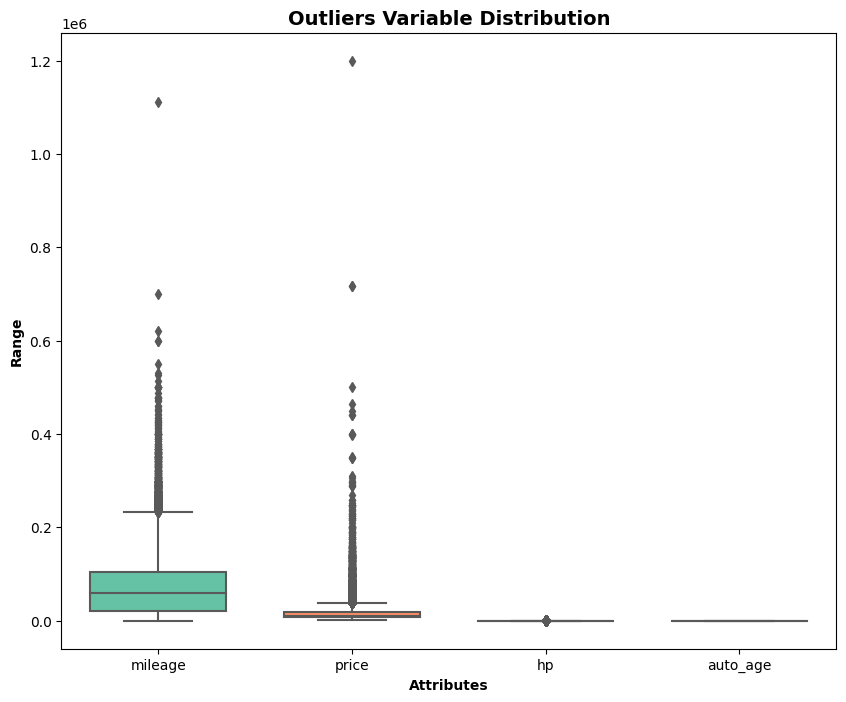

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_numeric[numeric_attrs], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Удаление выбросов для [mileage]
Q1 = df_numeric.mileage.quantile(0.05)
Q3 = df_numeric.mileage.quantile(0.95)
IQR = Q3 - Q1
df_numeric = df_numeric[(df_numeric.mileage >= Q1 - 1.5 * IQR) & (df_numeric.mileage <= Q3 + 1.5 * IQR)]

# Удаление выбросов для [price]
Q1 = df_numeric.price.quantile(0.05)
Q3 = df_numeric.price.quantile(0.95)
IQR = Q3 - Q1
df_numeric = df_numeric[(df_numeric.price >= Q1 - 1.5 * IQR) & (df_numeric.price <= Q3 + 1.5 * IQR)]

# Удаление выбросов для [hp]
Q1 = df_numeric.hp.quantile(0.05)
Q3 = df_numeric.hp.quantile(0.95)
IQR = Q3 - Q1
df_numeric = df_numeric[(df_numeric.hp >= Q1 - 1.5 * IQR) & (df_numeric.hp <= Q3 + 1.5 * IQR)]

# Удаление выбросов для [auto_age]
Q1 = df_numeric.auto_age.quantile(0.05)
Q3 = df_numeric.auto_age.quantile(0.95)
IQR = Q3 - Q1
df_numeric = df_numeric[(df_numeric.auto_age >= Q1 - 1.5 * IQR) & (df_numeric.auto_age <= Q3 + 1.5 * IQR)]

print(f"Размер df_numeric после удаления выбросов= {df_numeric.shape}")

Размер df_numeric после удаления выбросов= (45673, 4)


In [ ]:
from sklearn import preprocessing

In [ ]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric)

In [ ]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=numeric_attrs)
df_numeric_scaled.head()

,mileage,price,hp,auto_age
0,0.509761,0.058229,0.217391,1.0
1,0.201302,0.059015,0.228733,1.0
2,0.323861,0.059250,0.300567,1.0
3,0.208677,0.059761,0.206049,1.0
4,0.338395,0.059761,0.293006,1.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

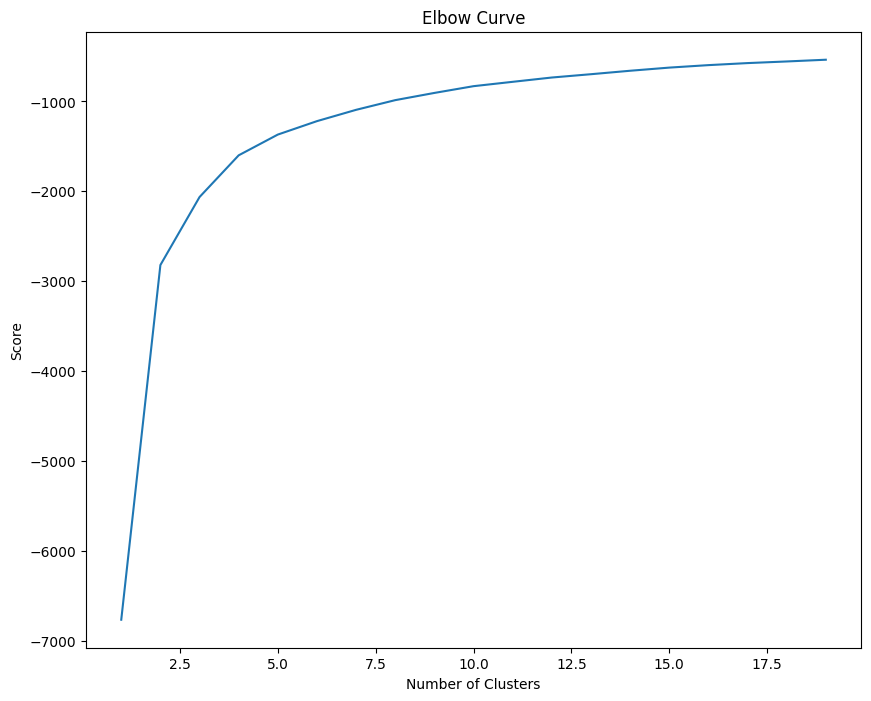

In [ ]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_numeric_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [ ]:
len(kmeans.labels_)

45673

In [ ]:
import numpy as np
import seaborn as sns

print(f"kmeans.labels_ = {kmeans.labels_}")
print(f"kmeans.cluster_centers_ = {kmeans.cluster_centers_}")
print(f"kmeans = {kmeans}")

kmeans.labels_ = [10  1 10 ...  0  0  0]
kmeans.cluster_centers_ = [[0.00555987 0.1478693  0.16590988 0.03447537]
 [0.20394235 0.05867651 0.192059   0.94760653]
 [0.13678543 0.23839177 0.33642435 0.36674749]
 [0.13599208 0.08389131 0.18348127 0.63506034]
 [0.04280355 0.72212403 0.70054811 0.14813614]
 [0.10923814 0.08954872 0.16690538 0.45707486]
 [0.44590795 0.08078116 0.26502518 0.72013182]
 [0.02451737 0.4418604  0.41512085 0.09249106]
 [0.02429451 0.26735683 0.28505109 0.10666995]
 [0.30662497 0.09989777 0.24323168 0.47976043]
 [0.41162323 0.06207739 0.25808836 0.95431098]
 [0.25907887 0.25594928 0.55386149 0.796     ]
 [0.20720076 0.07847626 0.20898317 0.76627497]
 [0.06551774 0.11991596 0.17533845 0.24649801]
 [0.13318591 0.3880939  0.56280906 0.36018212]]
kmeans = KMeans(n_clusters=15)


In [ ]:
df_numeric['cluster'] = kmeans.labels_
df_numeric.head()

,mileage,price,hp,auto_age,cluster
0,235000,6800,116.0,12,10
1,92800,6877,122.0,12,1
2,149300,6900,160.0,12,10
3,96200,6950,110.0,12,1
4,156000,6950,156.0,12,10


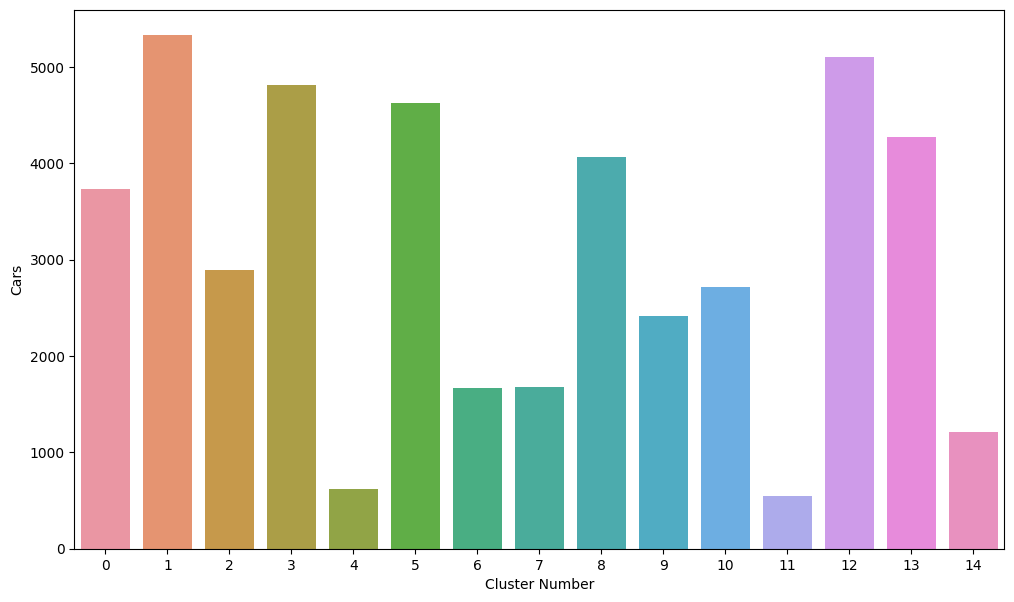

In [ ]:
import numpy as np

plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,15,1),y=df_numeric.groupby(['cluster']).count()['price'].values)
x=axis.set_xlabel("Cluster Number")
y=axis.set_ylabel("Cars")

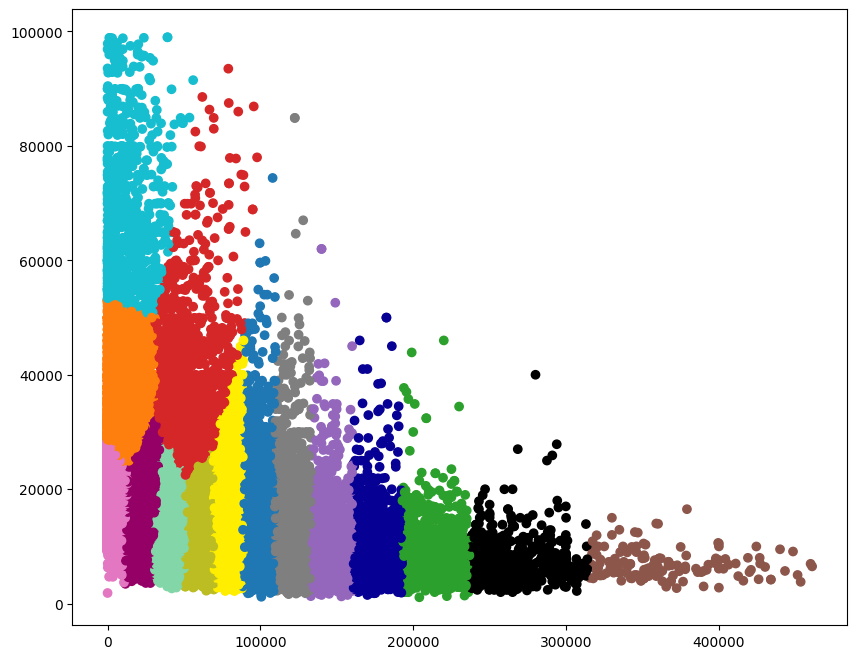

In [77]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

labels = kmeans.labels_

LABEL_COLOR_MAP = {0 :'#1f77b4',
                   1 :'#ff7f0e',
                   2 :'#2ca02c',
                   3 :'#d62728',
                   4 :'#9467bd',
                   5 :'#8c564b',
                   6 :'#e377c2',
                   7 :'#7f7f7f',
                   8 :'#bcbd22',
                   9 :'#17becf',
                   10 :'#000000',
                   11 :'#83d6a7',
                   12 :'#070094',
                   13 :'#940065',
                   14 :'#ffee00'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.scatter(df_numeric.iloc[:,0], df_numeric.iloc[:,1], c=label_color)
plt.show()